In [0]:
"""
Created on Sun Mar 22 02:09 2020
@author: Héctor & Pati
@subject: DLAS
"""

In [0]:
# Needed imports to run the program

import os
import ast
import numpy as np
import pandas as pd

import scipy.io

from matplotlib import pyplot as plt


from keras.layers.core import Dense, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential

import tensorflow as tf
from tensorflow import keras
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.layers import Dense, Dropout, Activation, Flatten, Embedding
from keras import optimizers
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.utils.vis_utils import plot_model

from google.colab import drive
drive.mount('/content/gdrive')


Using TensorFlow backend.


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# Load of previously processed x and y datasets.
x_train = np.load("/content/gdrive/My Drive/DLAS/x_train_scaled.npy")
y_train = np.load("/content/gdrive/My Drive/DLAS/y_train_labeled.npy")

In [0]:
# LSTM model definition

dense_output_classes = y_train.shape[1]

model = Sequential()
model.add(LSTM(512, input_shape=(x_train.shape[1:]), activation='sigmoid', return_sequences=True))
model.add(Dropout(0.2))

#model.add(LSTM(512, activation='sigmoid', return_sequences=True))
#model.add(Dropout(0.2))

model.add(LSTM(512, activation='sigmoid'))
model.add(Dropout(0.2))

model.add(Dense(dense_output_classes, activation='softmax'))

opt = optimizers.RMSprop(lr=0.001)
#opt = optimizers.Adam(learning_rate=0.001)

# LSTM model compilation and summary of the model
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 40, 512)           1933312   
_________________________________________________________________
dropout_1 (Dropout)          (None, 40, 512)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 512)               2099200   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 1539      
Total params: 4,034,051
Trainable params: 4,034,051
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Training process of the model
# The history of the model is stored in history variable for future plotting
history = model.fit(x_train,
          y_train, validation_split = 0.2,
          epochs=200, batch_size = 512)

Train on 58464 samples, validate on 14616 samples
Epoch 1/200
58464/58464 [==============================] - 25s 429us/step - loss: 1.2025 - accuracy: 0.3332 - val_loss: 1.1193 - val_accuracy: 0.3333
Epoch 2/200
58464/58464 [==============================] - 23s 394us/step - loss: 1.1057 - accuracy: 0.3381 - val_loss: 1.0976 - val_accuracy: 0.3395
Epoch 3/200
58464/58464 [==============================] - 23s 393us/step - loss: 1.0993 - accuracy: 0.3446 - val_loss: 1.0970 - val_accuracy: 0.3456
Epoch 4/200
58464/58464 [==============================] - 23s 391us/step - loss: 1.0948 - accuracy: 0.3533 - val_loss: 1.0999 - val_accuracy: 0.3386
Epoch 5/200
58464/58464 [==============================] - 23s 391us/step - loss: 1.0927 - accuracy: 0.3579 - val_loss: 1.0919 - val_accuracy: 0.3655
Epoch 6/200
58464/58464 [==============================] - 23s 396us/step - loss: 1.0898 - accuracy: 0.3636 - val_loss: 1.0899 - val_accuracy: 0.3560
Epoch 7/200
58464/58464 [=========================

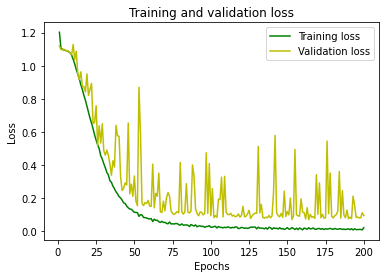

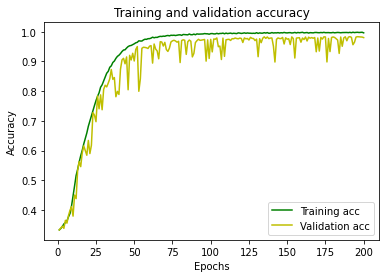

In [0]:
# The weights after the training process are stored in the experiment path
experiment_rootdir = "/content/gdrive/My Drive/DLAS/models/3_LSTM_dropout0.2_hl512_lr0001_RMSProp_b512_200epochs_sigmoid.h5"
model.save_weights(experiment_rootdir)

# Training and validation losses are plotted
plt.clf()
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'y', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Training and validation accuracy are plotted
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'y', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()